In [179]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
sb.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

%matplotlib inline
AirData=pd.read_csv('AviationData.csv',encoding='latin-1',index_col=False, dtype='unicode')

# Cleaning Data

In [180]:
AirData

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/7/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19/9/1996
2,20061025X01555,Accident,NYC07LA005,30/8/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/2/2007
3,20001218X45448,Accident,LAX96LA321,19/6/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,2/8/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16/4/1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2.02E+13,Accident,ERA23LA093,26/12/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0,1,0,0,NaN,NaN,NaN,29/12/2022
88885,2.02E+13,Accident,ERA23LA095,26/12/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
88886,2.02E+13,Accident,WPR23LA075,26/12/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0,0,0,1,VMC,NaN,NaN,27/12/2022
88887,2.02E+13,Accident,WPR23LA076,26/12/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0,0,0,0,NaN,NaN,NaN,NaN


In [181]:
#checking the data
AirData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      88889 non-null  object
 2   Accident.Number         88889 non-null  object
 3   Event.Date              88889 non-null  object
 4   Location                88837 non-null  object
 5   Country                 88663 non-null  object
 6   Latitude                34382 non-null  object
 7   Longitude               34373 non-null  object
 8   Airport.Code            50249 non-null  object
 9   Airport.Name            52790 non-null  object
 10  Injury.Severity         87889 non-null  object
 11  Aircraft.damage         85695 non-null  object
 12  Aircraft.Category       32287 non-null  object
 13  Registration.Number     87572 non-null  object
 14  Make                    88826 non-null  object
 15  Mo

In [182]:
#columns we think that are not important to our analysis
CleanData = AirData.drop(['Event.Id','Investigation.Type','Accident.Number','Location','Country','Latitude','Longitude','Airport.Code','Airport.Name','Injury.Severity','Aircraft.damage','Aircraft.Category','Registration.Number','FAR.Description','Schedule','Purpose.of.flight','Air.carrier','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Broad.phase.of.flight','Report.Status','Publication.Date','Number.of.Engines','Engine.Type','Amateur.Built'],axis='columns')

In [183]:
CleanData

,Event.Date,Make,Model,Total.Fatal.Injuries,Weather.Condition
0,24/10/1948,Stinson,108-3,2,UNK
1,19/7/1962,Piper,PA24-180,4,UNK
2,30/8/1974,Cessna,172M,3,IMC
3,19/6/1977,Rockwell,112,2,IMC
4,2/8/1979,Cessna,501,1,VMC
...,...,...,...,...,...
88884,26/12/2022,PIPER,PA-28-151,0,NaN
88885,26/12/2022,BELLANCA,7ECA,0,NaN
88886,26/12/2022,AMERICAN CHAMPION AIRCRAFT,8GCBC,0,VMC
88887,26/12/2022,CESSNA,210N,0,NaN


In [184]:
#Change Event.Date to Seasons
CleanData['Date'] = pd.to_datetime(CleanData['Event.Date'], format='%d/%m/%Y')
CleanData['Month'] = CleanData['Date'].dt.month
seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter',3: 'Spring', 4: 'Spring', 5: 'Spring',6: 'Summer', 7: 'Summer', 8: 'Summer',9: 'Fall', 10: 'Fall', 11: 'Fall'}
CleanData['Season'] = CleanData['Month'].map(seasons)

CleanData = CleanData.drop(['Event.Date','Date'],axis='columns')

In [185]:
#Change Total.Fatal.Injuries to just Fatal or Non-Fatal
x = CleanData['Total.Fatal.Injuries'].fillna('0')
x = x.astype(int)
FatalOrNot = x.mask(x>0,'Fatal')
FatalOrNot = FatalOrNot.replace(0,'Non-Fatal')
CleanData['FatalOrNot'] = FatalOrNot
CleanData = CleanData.drop(['Total.Fatal.Injuries'],axis='columns')

In [186]:
#Change Nan to UNK in Weather.Condition and make everything uppercase
CleanData['Weather.Condition'] = CleanData['Weather.Condition'].replace('Unk','UNK')
CleanData['Weather.Condition'] = CleanData['Weather.Condition'].fillna('UNK')

In [187]:
#Change all make to uppercase
CleanData['Make'] = CleanData['Make'].str.upper() 
CleanData

,Make,Model,Weather.Condition,Month,Season,FatalOrNot
0,STINSON,108-3,UNK,10,Fall,Fatal
1,PIPER,PA24-180,UNK,7,Summer,Fatal
2,CESSNA,172M,IMC,8,Summer,Fatal
3,ROCKWELL,112,IMC,6,Summer,Fatal
4,CESSNA,501,VMC,8,Summer,Fatal
...,...,...,...,...,...,...
88884,PIPER,PA-28-151,UNK,12,Winter,Non-Fatal
88885,BELLANCA,7ECA,UNK,12,Winter,Non-Fatal
88886,AMERICAN CHAMPION AIRCRAFT,8GCBC,VMC,12,Winter,Non-Fatal
88887,CESSNA,210N,UNK,12,Winter,Non-Fatal


# Fatality by Make

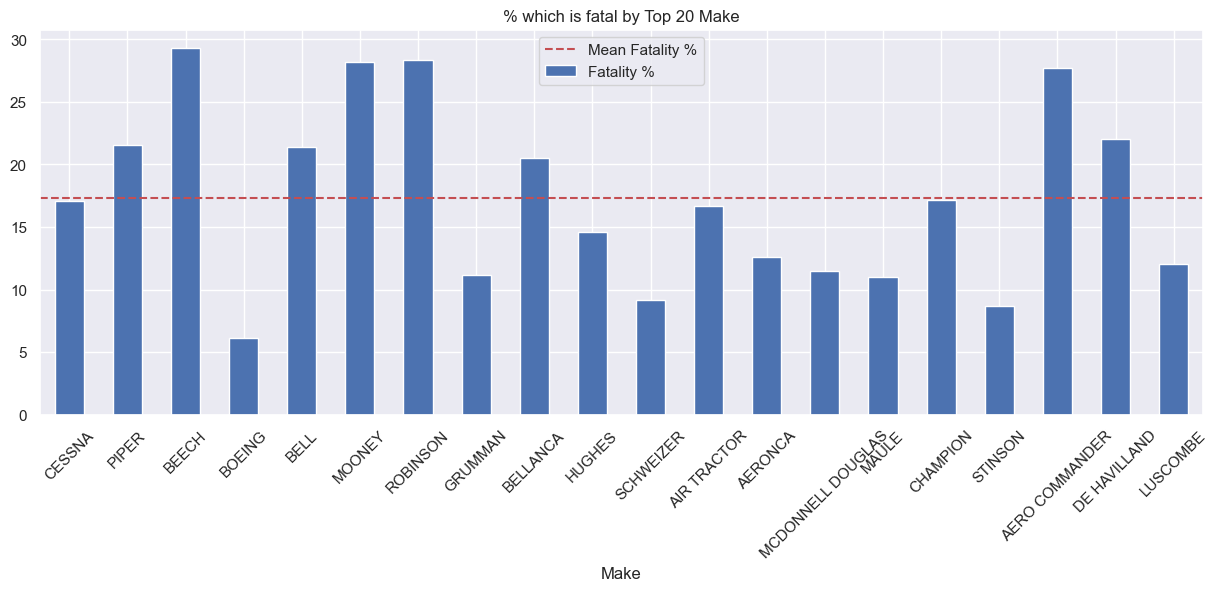

In [188]:
#get top 20 based on make
top20_Make = CleanData['Make'].value_counts().nlargest(20).index.tolist()
makedata = CleanData[CleanData['Make'].isin(top20_Make)]

#calculate percentage of accidents which results in fatality
make_percentfatal = makedata.groupby('Make')['FatalOrNot'].value_counts(normalize = True).unstack('FatalOrNot').reindex(top20_Make)
make_percentfatal['Fatal%'] = make_percentfatal['Fatal'] * 100
make_percentfatal = make_percentfatal.reset_index()

#plot out graph
plott = make_percentfatal.plot( kind = 'bar', x = 'Make', y = 'Fatal%', figsize = (15,5))
plott.set_title('% which is fatal by Top 20 Make', fontsize=12)
plott.tick_params(axis='x', rotation=45)
averagefatal = make_percentfatal['Fatal%'].mean()
plott.axhline( y= averagefatal, color = 'r', linestyle = '--')
plott.legend(['Mean Fatality %', 'Fatality %'])

The 3 makes with the highest fatality are beech, mooney and robinson. So, we will take a closer look at the models of these 3 makes

# Fatality by model (Beech, Mooney & Robinson)

In [189]:
#top 20 models for Beech
makebeech = makedata[makedata['Make']=='BEECH']
top20_beech = makebeech['Model'].value_counts().nlargest(20).index.tolist()
Bmodeldata = makebeech[makebeech['Model'].isin(top20_beech)]
# calculate percentage of accidents which results in fatality for top 20 models of Beech
Bmodel_percentfatal = Bmodeldata.groupby('Model')['FatalOrNot'].value_counts(normalize = True).unstack('FatalOrNot').reindex(top20_beech)
Bmodel_percentfatal['Fatal%'] = Bmodel_percentfatal['Fatal'] * 100
Bmodel_percentfatal = Bmodel_percentfatal.reset_index()

#top 20 models for Mooney
makemooney = makedata[makedata['Make']=='MOONEY']
top20_mooney = makemooney['Model'].value_counts().nlargest(20).index.tolist()
Mmodeldata = makemooney[makemooney['Model'].isin(top20_mooney)]
# calculate percentage of accidents which results in fatality for top 20 models of Mooney
Mmodel_percentfatal = Mmodeldata.groupby('Model')['FatalOrNot'].value_counts(normalize = True).unstack('FatalOrNot').reindex(top20_mooney)
Mmodel_percentfatal['Fatal%'] = Mmodel_percentfatal['Fatal'] * 100
Mmodel_percentfatal = Mmodel_percentfatal.reset_index()

#top 20 models for Robinson
makerobinson = makedata[makedata['Make']=='ROBINSON']
top20_robinson = makerobinson['Model'].value_counts().nlargest(20).index.tolist()
Rmodeldata = makerobinson[makerobinson['Model'].isin(top20_robinson)]
# calculate percentage of accidents which results in fatality for top 20 models of Robinson
Rmodel_percentfatal = Rmodeldata.groupby('Model')['FatalOrNot'].value_counts(normalize = True).unstack('FatalOrNot').reindex(top20_robinson)
Rmodel_percentfatal['Fatal%'] = Rmodel_percentfatal['Fatal'] * 100
Rmodel_percentfatal = Rmodel_percentfatal.reset_index()

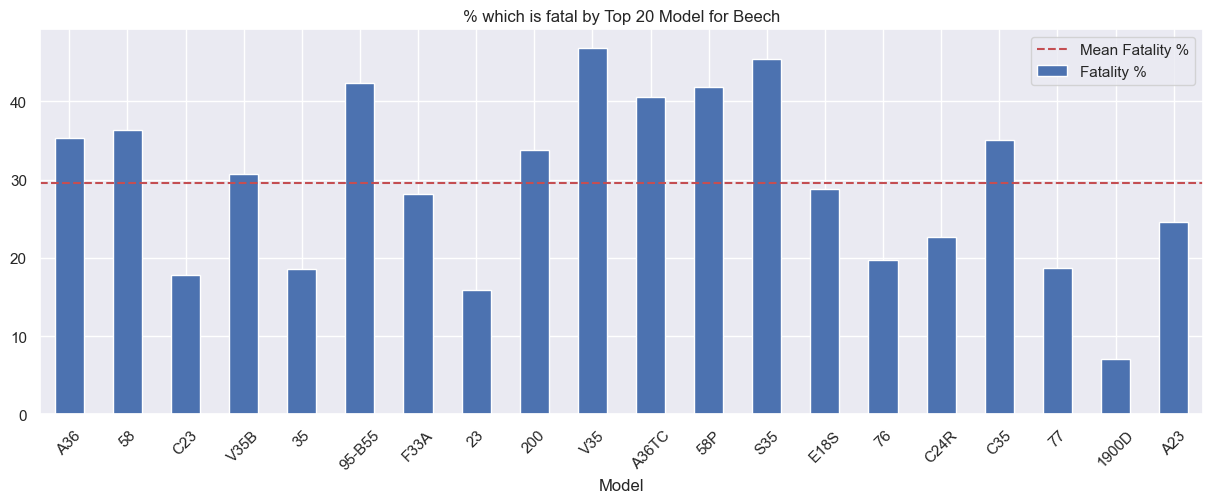

In [190]:
plott = Bmodel_percentfatal.plot( kind = 'bar', x = 'Model', y = 'Fatal%', figsize = (15,5))
plott.set_title('% which is fatal by Top 20 Model for Beech', fontsize=12)
plott.tick_params(axis='x', rotation=45)
averagefatal = Bmodel_percentfatal['Fatal%'].mean()
plott.axhline( y= averagefatal, color = 'r', linestyle = '--')
plott.legend(['Mean Fatality %', 'Fatality %'])

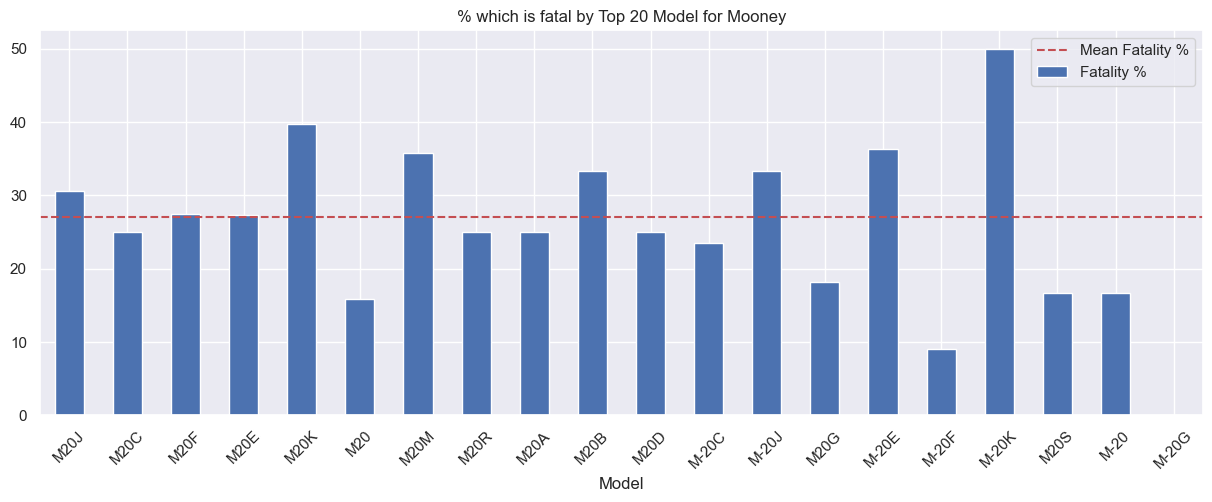

In [191]:
plott = Mmodel_percentfatal.plot( kind = 'bar', x = 'Model', y = 'Fatal%', figsize = (15,5))
plott.set_title('% which is fatal by Top 20 Model for Mooney', fontsize=12)
plott.tick_params(axis='x', rotation=45)
averagefatal = Mmodel_percentfatal['Fatal%'].mean()
plott.axhline( y= averagefatal, color = 'r', linestyle = '--')
plott.legend(['Mean Fatality %', 'Fatality %'])

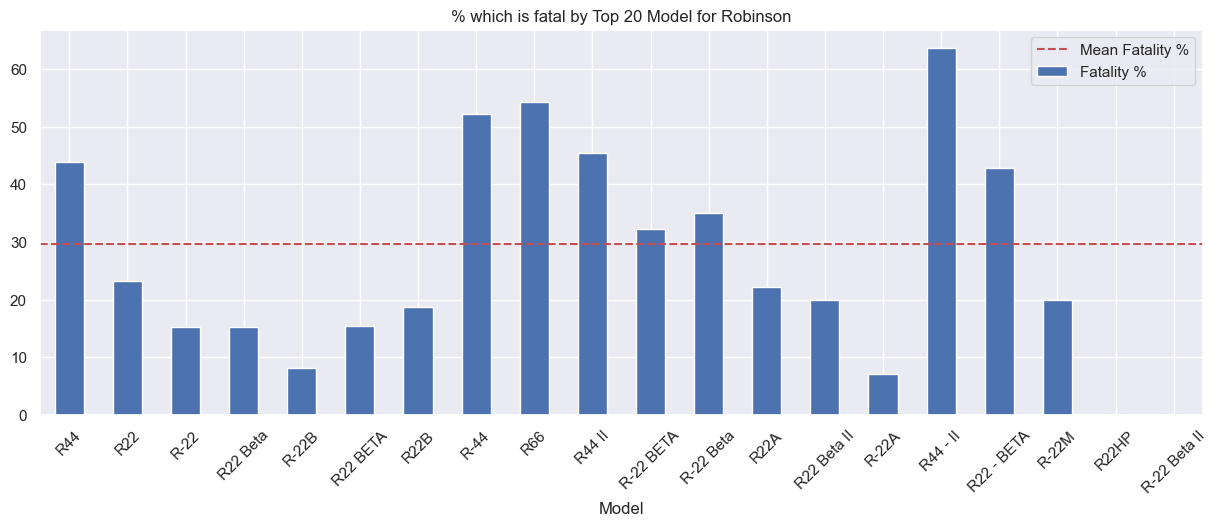

In [192]:
plott = Rmodel_percentfatal.plot( kind = 'bar', x = 'Model', y = 'Fatal%', figsize = (15,5))
plott.set_title('% which is fatal by Top 20 Model for Robinson', fontsize=12)
plott.tick_params(axis='x', rotation=45)
averagefatal = Rmodel_percentfatal['Fatal%'].mean()
plott.axhline( y= averagefatal, color = 'r', linestyle = '--')
plott.legend(['Mean Fatality %', 'Fatality %'])

# Fatality by Weather

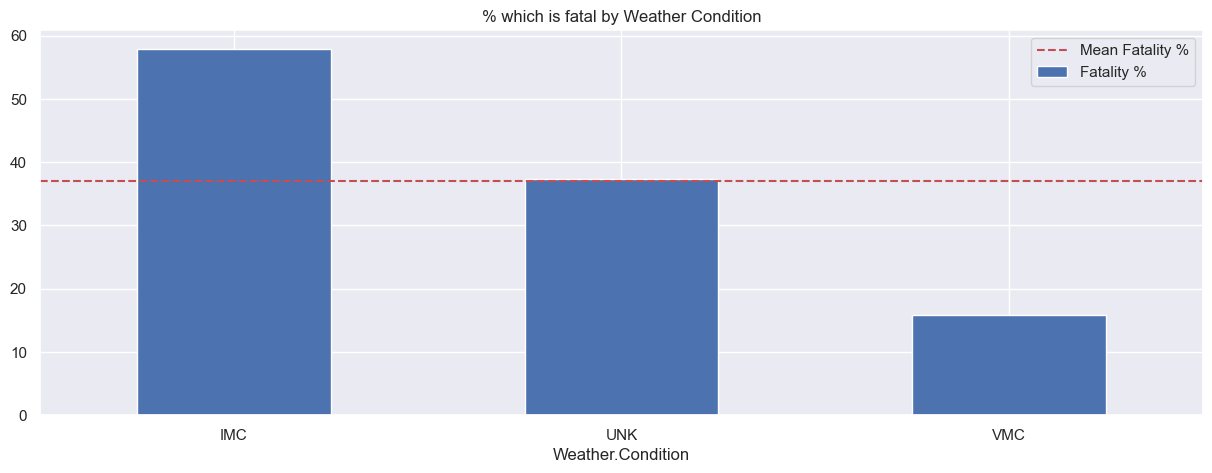

In [193]:
weatherdata = CleanData
weather_percentfatal = weatherdata.groupby('Weather.Condition')['FatalOrNot'].value_counts(normalize = True).unstack('FatalOrNot')
weather_percentfatal['Fatal%'] = weather_percentfatal['Fatal'] * 100
weather_percentfatal = weather_percentfatal.reset_index()

plott = weather_percentfatal.plot( kind = 'bar', x = 'Weather.Condition', y = 'Fatal%', figsize = (15,5))
plott.set_title('% which is fatal by Weather Condition', fontsize=12)
plott.tick_params(axis='x', rotation=0)
averagefatal = weather_percentfatal['Fatal%'].mean()
plott.axhline( y= averagefatal, color = 'r', linestyle = '--')
plott.legend(['Mean Fatality %', 'Fatality %'])

# Fatality by month & season

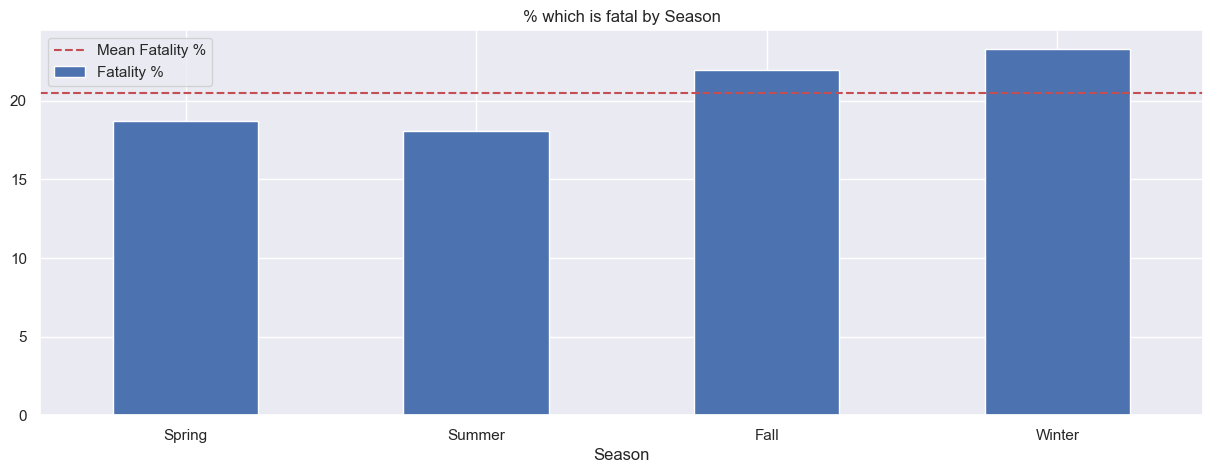

In [194]:
seasondata = CleanData
season_percentfatal = seasondata.groupby('Season')['FatalOrNot'].value_counts(normalize = True).unstack('FatalOrNot')
season_percentfatal['Fatal%'] = season_percentfatal['Fatal'] * 100
season_percentfatal = season_percentfatal.reset_index()
season_percentfatal = season_percentfatal.reindex([1,2,0,3])

plott = season_percentfatal.plot( kind = 'bar', x = 'Season', y = 'Fatal%', figsize = (15,5))
plott.set_title('% which is fatal by Season', fontsize=12)
plott.tick_params(axis='x', rotation=0)
averagefatal = season_percentfatal['Fatal%'].mean()
plott.axhline( y= averagefatal, color = 'r', linestyle = '--')
plott.legend(['Mean Fatality %', 'Fatality %'])

Spring: March, April, May  
Summer: June, July, August  
Fall: September, October, November  
Winter: December, January, February

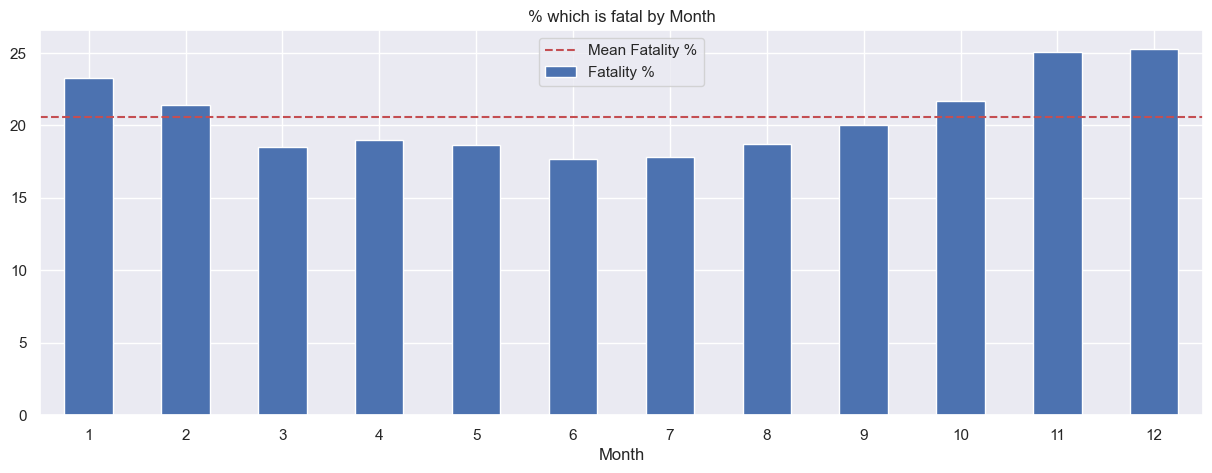

In [195]:
monthdata = CleanData
month_percentfatal = monthdata.groupby('Month')['FatalOrNot'].value_counts(normalize = True).unstack('FatalOrNot')
month_percentfatal['Fatal%'] = month_percentfatal['Fatal'] * 100
month_percentfatal = month_percentfatal.reset_index()

plott = month_percentfatal.plot( kind = 'bar', x = 'Month', y = 'Fatal%', figsize = (15,5))
plott.set_title('% which is fatal by Month', fontsize=12)
plott.tick_params(axis='x', rotation=0)
averagefatal = month_percentfatal['Fatal%'].mean()
plott.axhline( y= averagefatal, color = 'r', linestyle = '--')
plott.legend(['Mean Fatality %', 'Fatality %'])

# One-hot encoding

In [196]:
df_encoded = pd.get_dummies(makedata, columns=['FatalOrNot'], dtype=int, drop_first=True)
df_encoded = pd.get_dummies(df_encoded, columns=['Season'], dtype=int)
df_encoded = pd.get_dummies(df_encoded, columns=['Month'], dtype=int)
df_encoded = pd.get_dummies(df_encoded, columns=['Weather.Condition'], dtype=int)
df_encoded = pd.get_dummies(df_encoded, columns=['Model'], dtype=int)
df_encoded = pd.get_dummies(df_encoded, columns=['Make'], dtype=int)

In [197]:
df_encoded

,FatalOrNot_Non-Fatal,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Month_1,Month_2,Month_3,Month_4,Month_5,...,Make_GRUMMAN,Make_HUGHES,Make_LUSCOMBE,Make_MAULE,Make_MCDONNELL DOUGLAS,Make_MOONEY,Make_PIPER,Make_ROBINSON,Make_SCHWEIZER,Make_STINSON
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88883,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88884,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
88885,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88887,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Random forest classifier

In [198]:
y = pd.DataFrame(df_encoded['FatalOrNot_Non-Fatal'])
X = df_encoded.drop(['FatalOrNot_Non-Fatal'],axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators= 10, random_state=42)

random_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

Train Data Classification Accuracy:  0.8877945077235138
Train Data  True Positive Rate: 0.9825942510472339
Train Data  True Negative Rate: 0.4832545716046846
Train Data False Positive Rate: 0.5167454283953153
Train Data False Negative Rate: 0.017405748952766142


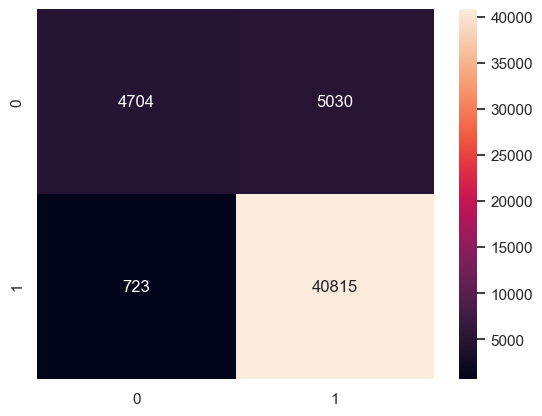

In [199]:
#Train set prediction

y_train_pred = random_forest.predict(X_train)

from sklearn.metrics import confusion_matrix
CM_train = confusion_matrix(y_train, y_train_pred)
sb.heatmap(CM_train, annot = True, fmt='.0f')

from sklearn.metrics import accuracy_score
print('Train Data Classification Accuracy: ', accuracy_score(y_train, y_train_pred))

TP = CM_train[1][1]
FP = CM_train[0][1]
TN = CM_train[0][0]
FN = CM_train[1][0]

print('Train Data  True Positive Rate:',TP/(TP+FN))
print('Train Data  True Negative Rate:',TN/(TN+FP))
print('Train Data False Positive Rate:',FP/(TN+FP))
print('Train Data False Negative Rate:',FN/(TP+FN))

Train Data Classification Accuracy:  0.9163741321475934
Test Data  True Positive Rate: 0.9872016936104696
Test Data  True Negative Rate: 0.6131025957972805
Test Data False Positive Rate: 0.3868974042027194
Test Data False Negative Rate: 0.012798306389530409


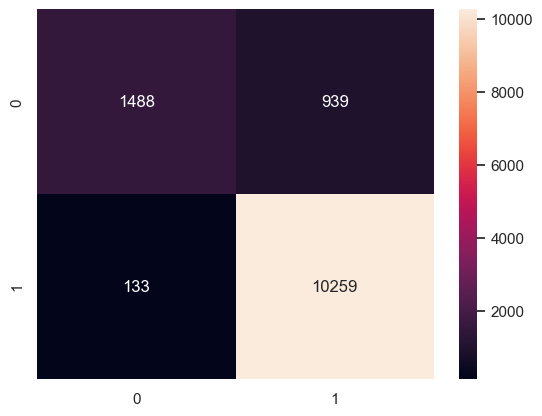

In [200]:
#Test set prediction

random_forest.fit(X_test, y_test.values.ravel())
y_test_pred = random_forest.predict(X_test)

CM_test = confusion_matrix(y_test, y_test_pred)
sb.heatmap(CM_test, annot = True, fmt='.0f')

print('Train Data Classification Accuracy: ', accuracy_score(y_test, y_test_pred))

TP = CM_test[1][1]
FP = CM_test[0][1]
TN = CM_test[0][0]
FN = CM_test[1][0]

print('Test Data  True Positive Rate:',TP/(TP+FN))
print('Test Data  True Negative Rate:',TN/(TN+FP))
print('Test Data False Positive Rate:',FP/(TN+FP))
print('Test Data False Negative Rate:',FN/(TP+FN))

# Refinement of dataset

In [201]:
# view the feature scores

feature_scores = pd.Series(random_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Weather.Condition_VMC    0.075728
Weather.Condition_IMC    0.064961
Weather.Condition_UNK    0.019420
Make_BOEING              0.012568
Month_7                  0.012314
                           ...   
Model_BH 125-600A        0.000000
Model_BH 206-L111        0.000000
Model_BH 206BII          0.000000
Model_BH 206L-3          0.000000
Model_C-140A             0.000000
Length: 4104, dtype: float64

In [202]:
#Convert to data frame

feature_scores = pd.DataFrame(feature_scores)

#Store all the zero variables in a new dataframe
Non_zero = feature_scores.loc[~(feature_scores==0).all(axis=1)]
zero = feature_scores.loc[~(feature_scores!=0).all(axis=1)]

# Get row names/index labels and store them in a list
row_names_list = zero.index.tolist()

#Drop all the variables which have a feature value of 0 
X = X.drop(columns=row_names_list, axis=1)
X.shape

(64091, 1834)

In [203]:
#Refit the random forest again

y = pd.DataFrame(df_encoded['FatalOrNot_Non-Fatal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators= 10, random_state=42)

random_forest.fit(X_train, y_train.values.ravel())

X_train.shape

(51272, 1834)

Train Data Classification Accuracy:  0.877945077235138
Train Data  True Positive Rate: 0.9808368241128606
Train Data  True Negative Rate: 0.43887404972262173
Train Data False Positive Rate: 0.5611259502773782
Train Data False Negative Rate: 0.019163175887139488


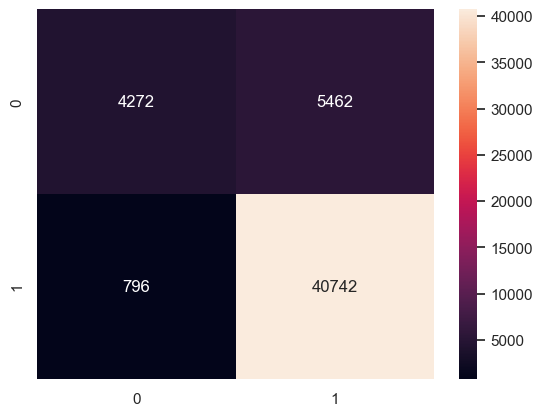

In [204]:
#Train set prediction

y_train_pred = random_forest.predict(X_train)

from sklearn.metrics import confusion_matrix
CM_train = confusion_matrix(y_train, y_train_pred)
sb.heatmap(CM_train, annot = True, fmt='.0f')

from sklearn.metrics import accuracy_score
print('Train Data Classification Accuracy: ', accuracy_score(y_train, y_train_pred))

TP = CM_train[1][1]
FP = CM_train[0][1]
TN = CM_train[0][0]
FN = CM_train[1][0]

print('Train Data  True Positive Rate:',TP/(TP+FN))
print('Train Data  True Negative Rate:',TN/(TN+FP))
print('Train Data False Positive Rate:',FP/(TN+FP))
print('Train Data False Negative Rate:',FN/(TP+FN))

Train Data Classification Accuracy:  0.9163741321475934
Test Data  True Positive Rate: 0.9867205542725174
Test Data  True Negative Rate: 0.61516275236918
Test Data False Positive Rate: 0.38483724763081995
Test Data False Negative Rate: 0.013279445727482679


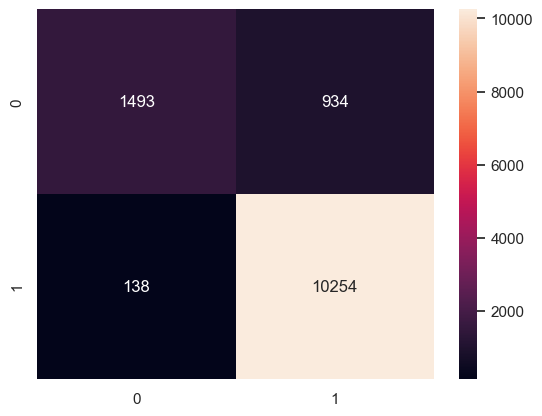

In [205]:
#Test set prediction

random_forest.fit(X_test, y_test.values.ravel())
y_test_pred = random_forest.predict(X_test)

CM_test = confusion_matrix(y_test, y_test_pred)
sb.heatmap(CM_test, annot = True, fmt='.0f')

print('Train Data Classification Accuracy: ', accuracy_score(y_test, y_test_pred))

TP = CM_test[1][1]
FP = CM_test[0][1]
TN = CM_test[0][0]
FN = CM_test[1][0]

print('Test Data  True Positive Rate:',TP/(TP+FN))
print('Test Data  True Negative Rate:',TN/(TN+FP))
print('Test Data False Positive Rate:',FP/(TN+FP))
print('Test Data False Negative Rate:',FN/(TP+FN))